In [1]:
# ===================== Decision Tree Classifier on the Iris Dataset =====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels (species)

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# ---------- Decision Tree Classifier with max_depth=2 ----------
# Instantiate the Decision Tree Classifier with max_depth=2
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Fit the model to the training set
dt.fit(X_train, y_train)

# Predict labels for the test set
y_pred = dt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🌳 Decision Tree Classifier Performance 🌳")
print("-" * 65)
print(f"Accuracy: {accuracy:.4f}")
print("-" * 65)

# ---------- Decision Tree Classifier with Gini Criterion ----------
# Instantiate another Decision Tree Classifier with the 'gini' criterion
dt_gini = DecisionTreeClassifier(criterion="gini", random_state=1)

# Fit the model to the training set
dt_gini.fit(X_train, y_train)

# Predict labels for the test set
y_pred_gini = dt_gini.predict(X_test)

# Evaluate the model's accuracy with 'gini' criterion
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"\n🌿 **Decision Tree Classifier Performance (Criterion: Gini)** 🌿")
print("-" * 65)
print(f"Accuracy: {accuracy_gini:.4f}")
print("-" * 65)


🌳 Decision Tree Classifier Performance 🌳
-----------------------------------------------------------------
Accuracy: 0.9333
-----------------------------------------------------------------

🌿 **Decision Tree Classifier Performance (Criterion: Gini)** 🌿
-----------------------------------------------------------------
Accuracy: 0.9667
-----------------------------------------------------------------


In [2]:
# ===================== Decision Tree Regressor with Cross-validation on the Iris Dataset =====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.tree import DecisionTreeRegressor

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels (species)

# Set seed for reproducibility
SEED = 123

# Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor with max depth of 4 and min samples per leaf of 0.14
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=SEED)

# Evaluate the model with 10-fold cross-validation using negative mean squared error as scoring
MSE_CV = -cross_val_score(dt, X_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)

# Fit the decision tree regressor to the training data
dt.fit(X_train, y_train)

# Predict on the training and test sets
y_predict_train = dt.predict(X_train)
y_predict_test = dt.predict(X_test)

# Calculate and print the cross-validation MSE (Mean Squared Error)
print(f"\n🌳 Decision Tree Regressor Performance (CV & MSE) 🌳")
print("=" * 53)
print(f"💼 Cross-validation MSE: {MSE_CV.mean():.3f}")
print("-" * 53)

# Calculate and print the training set MSE
train_mse = MSE(y_train, y_predict_train)
print(f"📈 Train MSE: {train_mse:.3f}")
print("-" * 53)

# Calculate and print the test set MSE
test_mse = MSE(y_test, y_predict_test)
print(f"🧪 Test MSE: {test_mse:.3f}")
print("-" * 53)

# Compute the Root Mean Squared Error (RMSE) for the test set
rmse_dt = test_mse**(1/2)
print(f"🔍 RMSE for Test Set: {rmse_dt:.3f}")
print("-" * 53)


🌳 Decision Tree Regressor Performance (CV & MSE) 🌳
💼 Cross-validation MSE: 0.079
-----------------------------------------------------
📈 Train MSE: 0.033
-----------------------------------------------------
🧪 Test MSE: 0.034
-----------------------------------------------------
🔍 RMSE for Test Set: 0.185
-----------------------------------------------------


In [3]:
# ===================== Voting Classifier with Logistic Regression, KNN, and Decision Tree on the Iris Dataset =====================
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels (species)

# Set seed for reproducibility
SEED = 1

# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)

# Define a list of classifiers with their names
classifiers = [
    ('Logistic Regression', lr),
    ('K Nearest Neighbours', knn),
    ('Decision Tree', dt)
]

# ---------- Classifier Performance ----------
# Iterate over the list of classifiers, fit each model to the training set, and evaluate its accuracy
print("\n🌟 Classifier Performance (Individual Models) 🌟")
print("-" * 49)

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)  # Fit classifier to the training data
    y_pred = clf.predict(X_test)  # Predict labels for the test data
    accuracy = accuracy_score(y_test, y_pred)  # Evaluate accuracy
    print(f"🚀 {clf_name}: {accuracy:.3f}")  # Print the accuracy of the model

print("-" * 49)

# ---------- Voting Classifier ----------
# Instantiate a VotingClassifier, which combines the individual classifiers
vc = VotingClassifier(estimators=classifiers)

# Fit the VotingClassifier to the training set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# Evaluate the accuracy of the VotingClassifier on the test set
vc_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the Voting Classifier
print(f"💡 Voting Classifier: {vc_accuracy:.3f}")
print("-" * 49)


🌟 Classifier Performance (Individual Models) 🌟
-------------------------------------------------
🚀 Logistic Regression: 0.978
🚀 K Nearest Neighbours: 0.978
🚀 Decision Tree: 0.956
-------------------------------------------------
💡 Voting Classifier: 0.956
-------------------------------------------------


In [4]:
# ===================== Bagging Classifier with Decision Tree as Base Estimator on the Iris Dataset =====================
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels (species)

# Set seed for reproducibility
SEED = 1

# Split data into 70% training and 30% testing, stratify to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

# Instantiate a Decision Tree Classifier (base estimator for Bagging)
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier with the Decision Tree as the base estimator
# Set 'oob_score=True' to enable Out-Of-Bag evaluation
bc = BaggingClassifier(estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)

# ---------- Model Training and Evaluation ----------
# Fit the BaggingClassifier to the training set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)

# Evaluate the test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Extract the Out-Of-Bag (OOB) accuracy
oob_accuracy = bc.oob_score_

# ---------- Results ----------
# Print the results in a well-formatted manner
print("\n🌟 Bagging Classifier Performance 🌟")
print("-" * 37)

# Test set accuracy
print(f"📊 Test Set Accuracy: {test_accuracy:.3f}")

# OOB accuracy
print(f"🔍 Out-Of-Bag (OOB) Accuracy: {oob_accuracy:.3f}")

print("-" * 37)


🌟 Bagging Classifier Performance 🌟
-------------------------------------
📊 Test Set Accuracy: 0.978
🔍 Out-Of-Bag (OOB) Accuracy: 0.933
-------------------------------------



🌟 Random Forest Regressor Performance 🌟
------------------------------------------
📊 Test set RMSE: 0.17
------------------------------------------



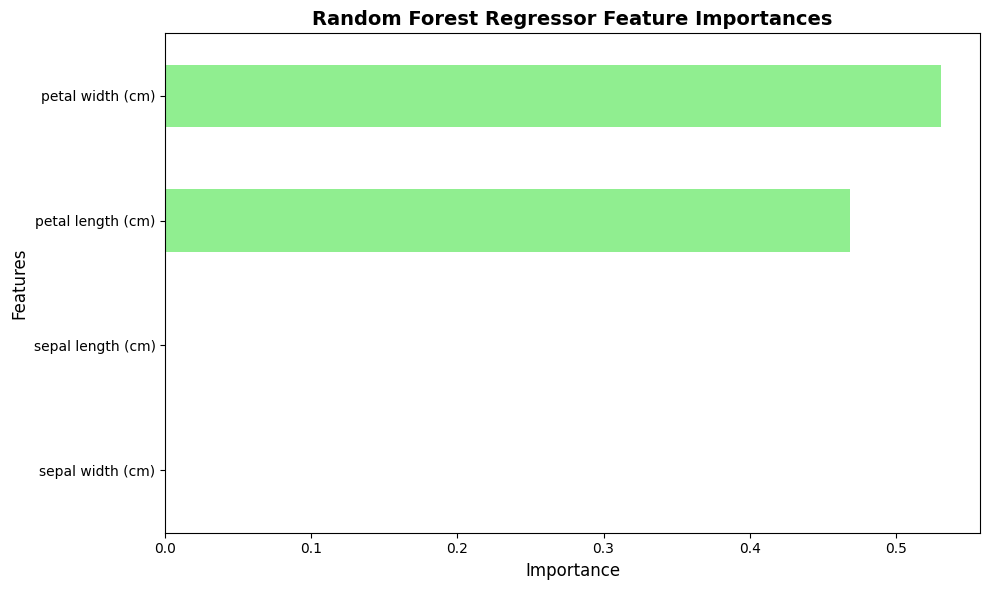

In [5]:
# ===================== Random Forest Regressor for Feature Importance and RMSE Calculation =====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.datasets import load_iris

from sklearn.ensemble import RandomForestRegressor

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Feature matrix
y = data.target  # Target variable

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a RandomForestRegressor with 400 estimators and min_samples_leaf=0.12
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

# ---------- Model Training ----------
# Fit the Random Forest Regressor to the training data
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Calculate the test set RMSE (Root Mean Squared Error)
rmse_test = MSE(y_test, y_pred)**(1/2)

# ---------- Results ----------
# Print the RMSE of the model on the test set
print("\n🌟 Random Forest Regressor Performance 🌟")
print("-" * 42)
print(f"📊 Test set RMSE: {rmse_test:.2f}")
print("-" * 42, end="\n\n")

# ---------- Feature Importance ----------
# Feature importance visualization
# Create a pandas Series to hold the feature importances
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)

# Sort the importances in descending order
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot for feature importance
plt.figure(figsize=(10, 6))
sorted_importances_rf.plot(kind='barh', color='lightgreen')

# Adding titles and labels
plt.title('Random Forest Regressor Feature Importances', fontsize=14, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
# ===================== AdaBoostClassifier =====================
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Set seed for reproducibility
SEED = 1

# Load the Iris dataset for classification
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the labels for multi-class ROC curve
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Split the dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)

# Initialize the base estimator (Decision Tree with max depth 1) for AdaBoost
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)

# Initialize the AdaBoost classifier with the Decision Tree as the base estimator
adb_clf = AdaBoostClassifier(estimator=dt, n_estimators=100, random_state=SEED)

# Fit the AdaBoost classifier to the training data
adb_clf.fit(X_train, y_train)

# Predict the probabilities for each class on the test set
y_pred_proba = adb_clf.predict_proba(X_test)

# Predict the class labels (class with the highest probability)
y_pred_class = np.argmax(y_pred_proba, axis=1)

# Output Predicted Probabilities and Class Labels for the first 5 samples
print("========== Predicted Probabilities (First 5 samples) ==========")
print(y_pred_proba[:5])  # Display the predicted probabilities for the first 5 samples

print("\n========== Predicted Class Labels (First 5 samples) ==========")
print(y_pred_class[:5])  # Display the predicted class labels for the first 5 samples

========== Predicted Probabilities (First 5 samples) ==========
[[0.25537814 0.34888151 0.39574035]
 [0.38930082 0.3284917  0.28220749]
 [0.38930082 0.3284917  0.28220749]
 [0.26267665 0.40783977 0.32948358]
 [0.26352366 0.38707548 0.34940086]]

========== Predicted Class Labels (First 5 samples) ==========
[2 0 0 1 1]


In [7]:
# ===================== GradientBoostingRegressor =====================
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

from sklearn.ensemble import GradientBoostingRegressor

# Set seed for reproducibility
SEED = 1

# Load the California Housing dataset for regression
california = fetch_california_housing()
X_regression = california.data
y_regression = california.target

# Split the California Housing dataset into 70% train and 30% test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression,
                                                                  test_size=0.3, random_state=SEED)

# ---------- Regression Model 1: GradientBoostingRegressor ----------

# Instantiate a GradientBoostingRegressor
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)

# Fit GradientBoostingRegressor to the training set
gbt.fit(X_train_reg, y_train_reg)

# Predict the test set labels
y_pred_gbt = gbt.predict(X_test_reg)

# Evaluate the test set RMSE
rmse_test_gbt = MSE(y_test_reg, y_pred_gbt)**(1/2)

# Print the test set RMSE for GradientBoostingRegressor
print("🌟 GradientBoostingRegressor Performance 🌟")
print("-" * 60)
print(f"📊 GradientBoostingRegressor Test Set RMSE: {rmse_test_gbt:.3f}")
print("=" * 60)

# ---------- Regression Model 2: Stochastic GradientBoostingRegressor ----------

# Instantiate a Stochastic GradientBoostingRegressor (SGBT)
sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=SEED)

# Fit StochasticGradientBoostingRegressor to the training set
sgbt.fit(X_train_reg, y_train_reg)

# Predict the test set labels
y_pred_sgbt = sgbt.predict(X_test_reg)

# Evaluate the test set RMSE for StochasticGradientBoostingRegressor
rmse_test_sgbt = MSE(y_test_reg, y_pred_sgbt)**(1/2)

# Print the test set RMSE for StochasticGradientBoostingRegressor
print("🌟 Stochastic GradientBoostingRegressor Performance 🌟")
print("-" * 60)
print(f"📊 Stochastic GradientBoostingRegressor Test Set RMSE: {rmse_test_sgbt:.3f}")
print("-" * 60)

🌟 GradientBoostingRegressor Performance 🌟
------------------------------------------------------------
📊 GradientBoostingRegressor Test Set RMSE: 0.615
🌟 Stochastic GradientBoostingRegressor Performance 🌟
------------------------------------------------------------
📊 Stochastic GradientBoostingRegressor Test Set RMSE: 0.656
------------------------------------------------------------
